# Datasets desbalanceados
- Ao trabalhar com datasets desbalanceados, precisamos ter cuidado tanto com as **métricas que geralmente usamos** quanto na **criação do modelo**
    - Modelos desbalanceados podem ter uma acurácia muito alta e mesmo assim não ser um bom modelo
    - Datasets desbalanceados podem tender a prever toda a base como a classe majoritária
- Para trabalhar com datasets desbalanceados, vamos usar a biblioteca imbalanced-learn
    - https://imbalanced-learn.org/stable/index.html

### Aprendizado de Máquinas em dataset desbalanceados
- Vamos testar fazer o processo de classificação utilizando o dataset abaixo disponível no Kaggle:
    - [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [190]:
# Importando a base de transações de cartão de crédito
import pandas as pd
base = pd.read_csv('creditcard.csv')

In [191]:
# Visualizando essa base
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [192]:
# Separando em X e y
X = base.drop('Class',axis=1)
y = base.Class

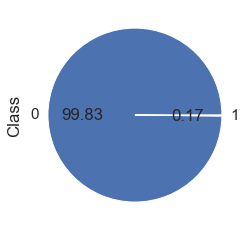

In [193]:
# Visualizando a proporção dessa base
y.value_counts().plot.pie(autopct='%.2f');

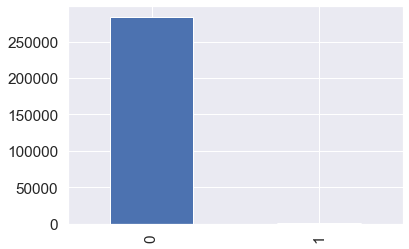

In [194]:
# Visualizando como um gráfico de barras
y.value_counts().plot.bar();

In [195]:
# Contando os valores em cada classe
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [196]:
# Verificando a proporção
(y.value_counts()/y.shape[0])*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

<a id='train_test_split'></a>
**Devemos inicialmente separar os dados em treino e teste usando o [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split)**

In [197]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [198]:
# Fazendo a separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, 
                                                    random_state=42,stratify=y)

In [199]:
# Verificando a proporção na base de treino
(y_train.value_counts()/y_train.shape[0])*100

0    99.827062
1     0.172938
Name: Class, dtype: float64

In [200]:
# Contando a quantidade de registros na base de treino
y_train.value_counts()

0    190490
1       330
Name: Class, dtype: int64

In [201]:
# E na base de teste
(y_test.value_counts()/y_test.shape[0])*100

0    99.827636
1     0.172364
Name: Class, dtype: float64

**<font color='blue'>Precisamos manter a mesma proporção entre as classes tanto no treino quanto no teste!</font>**
- Para resolver isso, no [train_test_split](#train_test_split) podemos utilizar o parâmetro `stratify` 

**Criando um modelo utilizando [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [202]:
# Importando a regressão logística
from sklearn.linear_model import LogisticRegression

In [203]:
# Definindo o nosso classificador
clf = LogisticRegression(random_state=0,max_iter=500)

In [204]:
# Fazendo o fit dos dados
clf = clf.fit(X_train,y_train)

c:\Users\dieggo.araujo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
# E então fazer a previsão da nossa base de teste
y_pred = clf.predict(X_test)

**E então [avaliando o modelo](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)**

In [206]:
# Importando o metrics do sklearn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc, roc_curve, roc_auc_score, accuracy_score, classification_report 

- Podemos começar avaliando a [acurácia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) do modelo

In [207]:
# Avaliando a acurácia do modelo
# accuracy_score(y_test,y_pred)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(clf.score(X_train, y_train))) 
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(clf.score(X_test, y_test))) 
print('Recall of logistic regression classifier on test set: {:.4f}'.format(recall_score(y_test, y_pred))) 
print('Precision of logistic regression classifier on test set: {:.4f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC of logistic regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))

Accuracy of logistic regression classifier on train set: 0.9992
Accuracy of logistic regression classifier on test set: 0.9992
Recall of logistic regression classifier on test set: 0.6296
Precision of logistic regression classifier on test set: 0.8644
ROC/AUC of logistic regression classifier on test set: 0.9374


**<font color='blue'>A acurácia em datasets desbalanceados, em geral, é muito alta</font>**<br>
**(só que isso não reflete a qualidade do nosso modelo)**
- Porém, na maioria das vezes, nosso foco está na classe minoritária (com menos registros) e a acurácia não mostra a qualidade do nosso modelo para prever essa classe
- Para resolver essa questão, podemos focar em outras métricas como a [matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) e o [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

![Confusiom Matrix](https://miro.medium.com/max/720/1*grX08nGnz9pSf5a1qTpOYw.png)

[Confusion Matrix with Recall and Precision formulas (drawing by author)](https://medium.com/@data.science.enthusiast/positive-class-in-machine-learning-how-to-define-classes-in-imbalanced-dataset-2940fd243a7e)

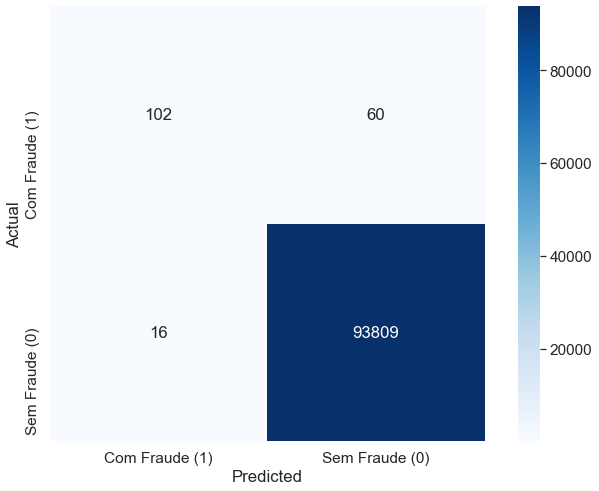

In [208]:
# Visualizando a matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

logreg_conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4) 
ax = sns.heatmap(logreg_conf_matrix, cmap='Blues', annot=True, fmt='d', square=True, 
                 xticklabels=['Sem Fraude (0)', 'Com Fraude (1)'], 
                 yticklabels=['Sem Fraude (0)', 'Com Fraude (1)']) 
ax.set(xlabel='Predicted', ylabel='Actual') 
ax.invert_yaxis() 
ax.invert_xaxis()

In [209]:
# E calculando o recall
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.6296296296296297

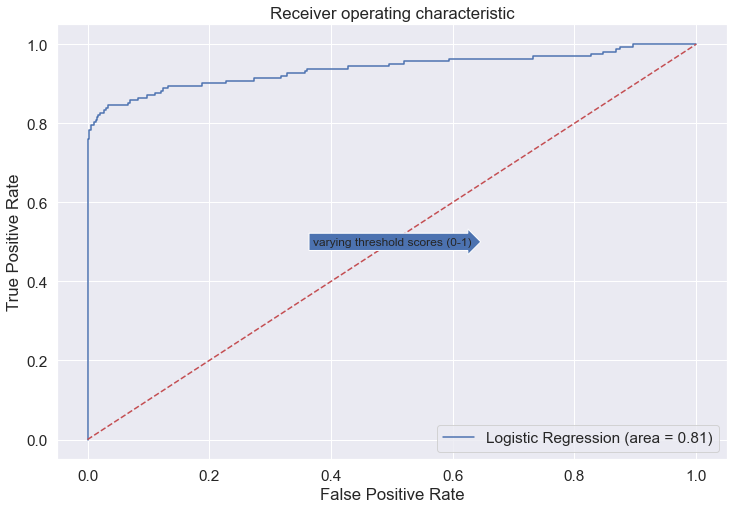

In [210]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve 

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", 
         rotation=0, size=12, ha="center", va="center",
         bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

No handles with labels found to put in legend.


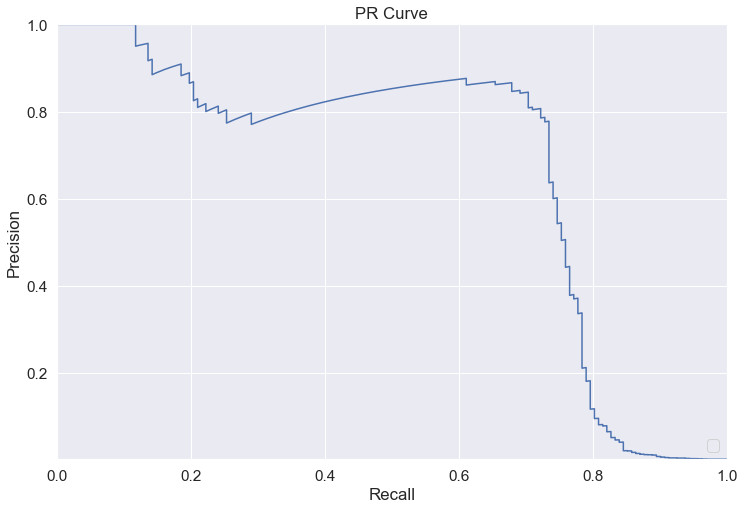

In [211]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.figure(figsize = (12,8))
plt.plot(recall, precision)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show();

### Podemos testar outros algoritmos para testar se eles funcionam melhor em datasets desbalanceados

**Utilizando a [árvore de classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)**

In [212]:
# Importando
from sklearn.tree import DecisionTreeClassifier

In [213]:
# Definindo o novo classificador
clfAD = DecisionTreeClassifier(random_state=0)

In [214]:
# Fazendo o fit com os dados
clfAD = clfAD.fit(X_train,y_train)

In [215]:
# Fazendo a previsão
y_predAD = clfAD.predict(X_test)

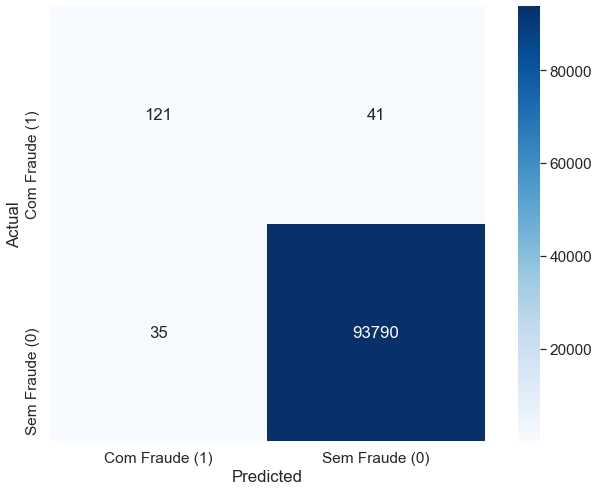

In [216]:
# Gerando a matriz de confusão
logreg_conf_matrix_dtc = confusion_matrix(y_test,y_predAD)
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4) 
ax = sns.heatmap(logreg_conf_matrix_dtc, cmap='Blues', annot=True, fmt='d', square=True, 
                 xticklabels=['Sem Fraude (0)', 'Com Fraude (1)'], 
                 yticklabels=['Sem Fraude (0)', 'Com Fraude (1)']) 
ax.set(xlabel='Predicted', ylabel='Actual') 
ax.invert_yaxis() 
ax.invert_xaxis()

In [217]:
# Calculando o recall
# recall_score(y_test,y_predAD)
print('Accuracy of Decision Tree Classifier on train set: {:.4f}'.format(clfAD.score(X_train, y_train))) 
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(clfAD.score(X_test, y_test))) 
print('Recall of Decision Tree Classifier on test set: {:.4f}'.format(recall_score(y_test, y_predAD))) 
print('Precision of Decision Tree Classifier on test set: {:.4f}'.format(precision_score(y_test, y_predAD))) 
print('ROC/AUC of Decision Tree Classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clfAD.predict_proba(X_test)[:,1])))

Accuracy of Decision Tree Classifier on train set: 1.0000
Accuracy of Decision Tree Classifier on test set: 0.9992
Recall of Decision Tree Classifier on test set: 0.7469
Precision of Decision Tree Classifier on test set: 0.7756
ROC/AUC of Decision Tree Classifier on test set: 0.8733


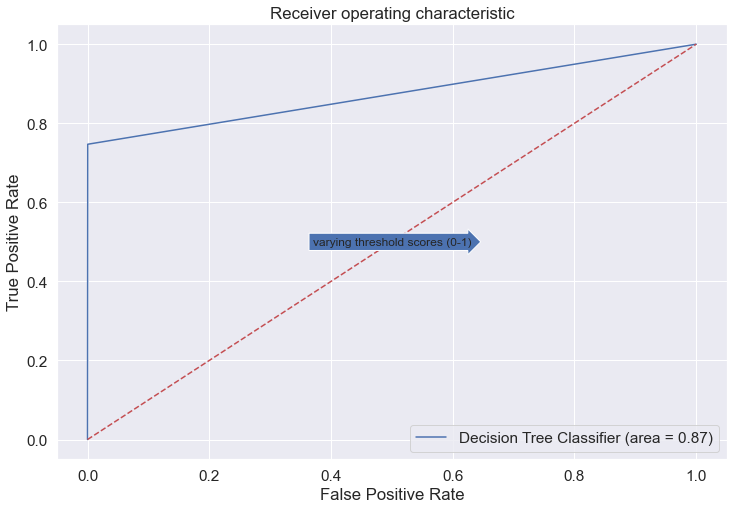

In [218]:
# Gerandao a ccurva ROC e AUC do modelo de Decision Tree
logit_roc_auc = roc_auc_score(y_test, clfAD.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, clfAD.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", 
         rotation=0, size=12, ha="center", va="center",
         bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

No handles with labels found to put in legend.


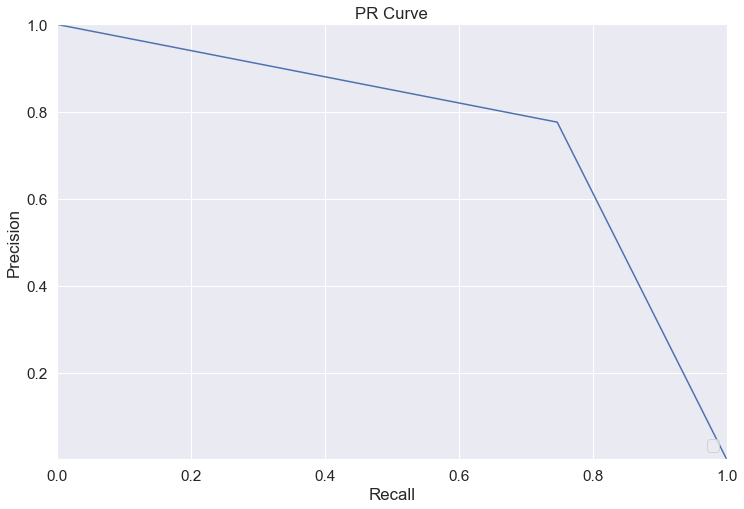

In [219]:
precision, recall, thresholds = precision_recall_curve(y_test, clfAD.predict_proba(X_test)[:, 1])
plt.figure(figsize = (12,8))
plt.plot(recall, precision)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()

### Balanceando o dataset
- Temos 2 classes:
    - Classe **majoritária**: a que possui **mais** registros
    - Classe **minoritária**: a que possui **menos** registros
- Podemos balancear o dataset **reduzindo os registros da classe majoritária** (com mais registros) ou **aumentando os registros da classe minoritária** (com menos registros)

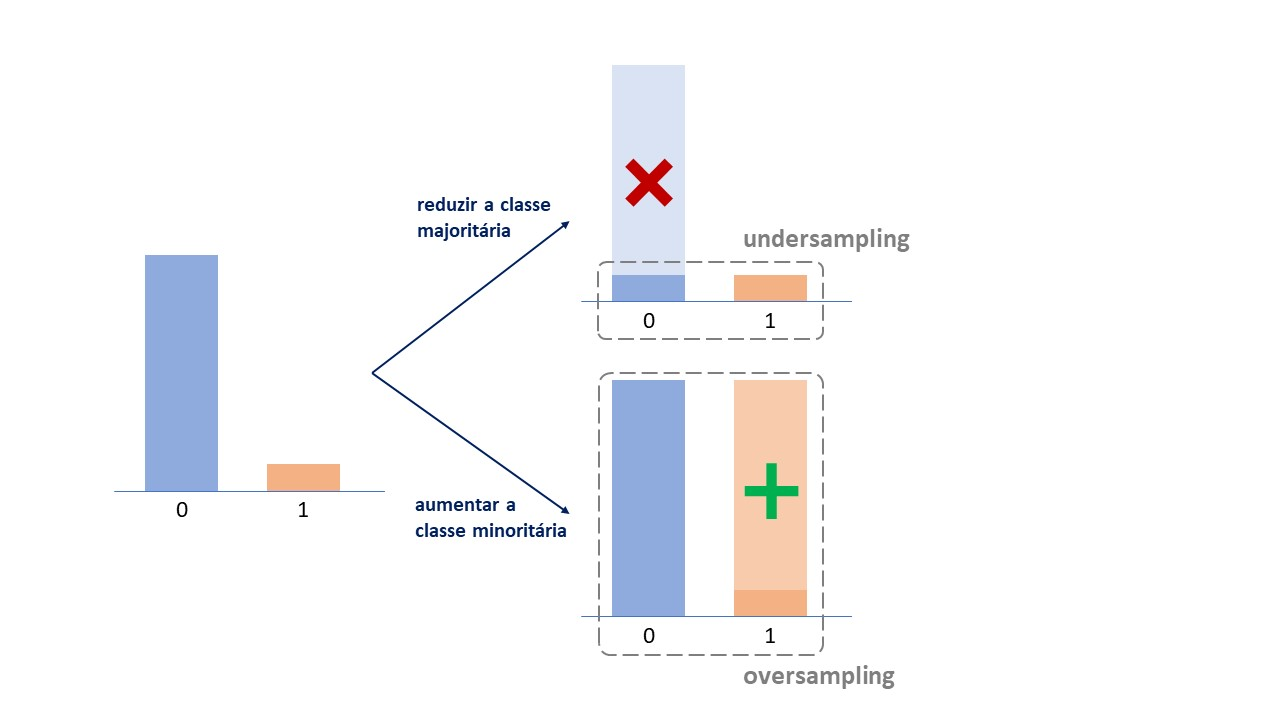

### Reduzindo os registros da classe majoritária
- Vamos retirar dados da classe que possui mais registros
    - Precisamos ter cuidado para que essa retirada não acabe causando perda de  informação (retirando informações que são muito importantes)
    - Também é necessário verificar o tamanho da base restante
- Podemos começar fazendo isso excluindo registros de forma aleatória com o **[RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler)**

In [220]:
# Instalando a biblioteca
# !pip install -U imbalanced-learn
# !pip install imblearn

In [221]:
# Importando o RandomUnderSampler do imblearn
from imblearn.under_sampling import RandomUnderSampler

In [222]:
# Definindo o RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [223]:
# Aplicando para X e y
X_res, y_res = rus.fit_resample(X_train, y_train)

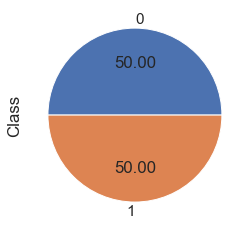

In [224]:
# Visualizando graficamente
y_res.value_counts().plot.pie(autopct='%.2f');

In [225]:
# Contando os valores em cada classe
y_res.value_counts()

0    330
1    330
Name: Class, dtype: int64

**Modelo Balanceado utilizando [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [226]:
# Podemos usar novamente a Regressão Logística e verificar o resultado
clf2 = LogisticRegression(random_state=0,max_iter=500)
clf2 = clf2.fit(X_res,y_res)
y_pred2 = clf2.predict(X_test)

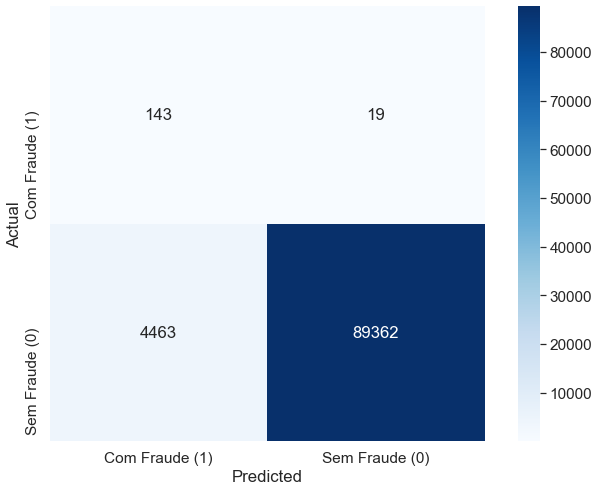

In [227]:
# Gerando a matriz de confusão
logreg_conf_matrix_lrb = confusion_matrix(y_test,y_pred2)
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4) 
ax = sns.heatmap(logreg_conf_matrix_lrb, cmap='Blues', annot=True, fmt='d', square=True, 
                 xticklabels=['Sem Fraude (0)', 'Com Fraude (1)'], 
                 yticklabels=['Sem Fraude (0)', 'Com Fraude (1)']) 
ax.set(xlabel='Predicted', 
       ylabel='Actual') 
ax.invert_yaxis() 
ax.invert_xaxis()

In [228]:
# Verificando o recall do modelo atual após o rebalanceamento das classes
# recall_score(y_test,y_pred2)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(clf2.score(X_train, y_train))) 
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(clf2.score(X_test, y_test))) 
print('Recall of logistic regression classifier on test set: {:.4f}'.format(recall_score(y_test, y_pred2))) 
print('Precision of logistic regression classifier on test set: {:.4f}'.format(precision_score(y_test, y_pred2))) 
print('ROC/AUC of logistic regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1])))

Accuracy of logistic regression classifier on train set: 0.9522
Accuracy of logistic regression classifier on test set: 0.9523
Recall of logistic regression classifier on test set: 0.8827
Precision of logistic regression classifier on test set: 0.0310
ROC/AUC of logistic regression classifier on test set: 0.9558


In [229]:
# Rodando os resultados do modelo anterior, antes do rebalanceamento das classes
# recall_score(y_test,y_pred)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(clf.score(X_train, y_train))) 
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(clf.score(X_test, y_test))) 
print('Recall of logistic regression classifier on test set: {:.4f}'.format(recall_score(y_test, y_pred))) 
print('Precision of logistic regression classifier on test set: {:.4f}'.format(precision_score(y_test, y_pred))) 
print('ROC/AUC of logistic regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))

Accuracy of logistic regression classifier on train set: 0.9992
Accuracy of logistic regression classifier on test set: 0.9992
Recall of logistic regression classifier on test set: 0.6296
Precision of logistic regression classifier on test set: 0.8644
ROC/AUC of logistic regression classifier on test set: 0.9374


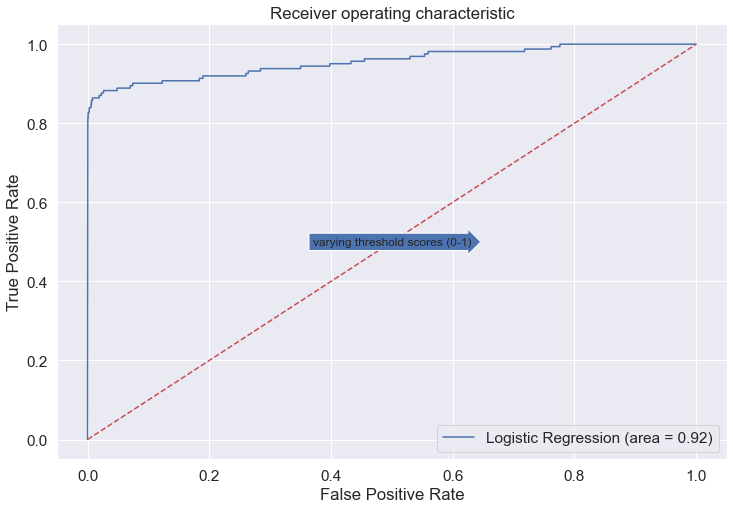

In [230]:

logit_roc_auc = roc_auc_score(y_test, clf2.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, clf2.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", 
         rotation=0, size=12, ha="center", va="center",
         bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

No handles with labels found to put in legend.


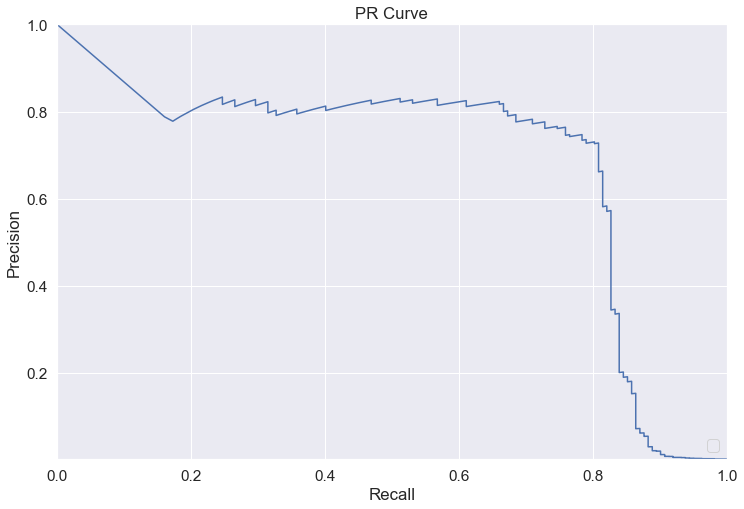

In [231]:
precision, recall, thresholds = precision_recall_curve(y_test, clf2.predict_proba(X_test)[:, 1])
plt.figure(figsize = (12,8))
plt.plot(recall, precision)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()

**Modelo Balanceado utilizando [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)**

In [232]:
# Utilizando a árvore de decisão
clfAD2 = DecisionTreeClassifier(random_state=0)
clfAD2 = clfAD2.fit(X_res,y_res)
y_predAD2 = clfAD2.predict(X_test)

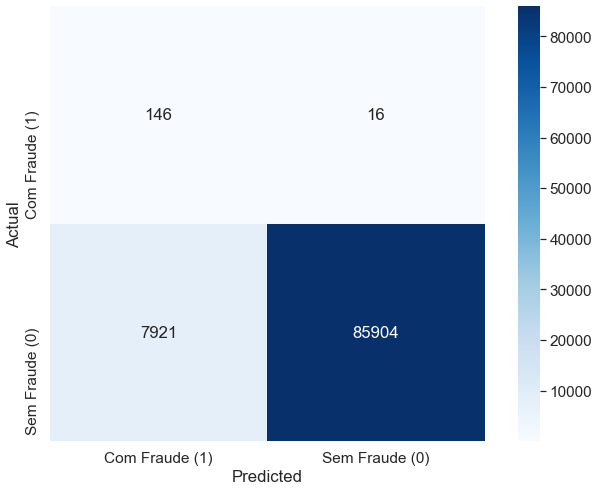

In [233]:
# Gerando a matriz de confusão
logreg_conf_matrix_dtb = confusion_matrix(y_test, y_predAD2)
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4) 
ax = sns.heatmap(logreg_conf_matrix_dtb, cmap='Blues', annot=True, fmt='d', square=True, 
                 xticklabels=['Sem Fraude (0)', 'Com Fraude (1)'], 
                 yticklabels=['Sem Fraude (0)', 'Com Fraude (1)']) 
ax.set(xlabel='Predicted', 
       ylabel='Actual') 
ax.invert_yaxis() 
ax.invert_xaxis()

In [234]:
# Verificando o recall
# recall_score(y_test,y_predAD2)
print('Accuracy of Decision Tree Classifier on train set: {:.4f}'.format(clfAD2.score(X_train, y_train))) 
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(clfAD2.score(X_test, y_test))) 
print('Recall of Decision Tree Classifier on test set: {:.4f}'.format(recall_score(y_test, y_predAD2))) 
print('Precision of Decision Tree Classifier on test set: {:.4f}'.format(precision_score(y_test, y_predAD2))) 
print('ROC/AUC of Decision Tree Classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clfAD2.predict_proba(X_test)[:,1])))

Accuracy of Decision Tree Classifier on train set: 0.9176
Accuracy of Decision Tree Classifier on test set: 0.9156
Recall of Decision Tree Classifier on test set: 0.9012
Precision of Decision Tree Classifier on test set: 0.0181
ROC/AUC of Decision Tree Classifier on test set: 0.9084


In [235]:
# Rodando os resultados do modelo anterior, antes do rebalanceamento das classes
print('Accuracy of Decision Tree Classifier on train set: {:.4f}'.format(clfAD.score(X_train, y_train))) 
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(clfAD.score(X_test, y_test))) 
print('Recall of Decision Tree Classifier on test set: {:.4f}'.format(recall_score(y_test, y_predAD))) 
print('Precision of Decision Tree Classifier on test set: {:.4f}'.format(precision_score(y_test, y_predAD))) 
print('ROC/AUC of Decision Tree Classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clfAD.predict_proba(X_test)[:,1])))

Accuracy of Decision Tree Classifier on train set: 1.0000
Accuracy of Decision Tree Classifier on test set: 0.9992
Recall of Decision Tree Classifier on test set: 0.7469
Precision of Decision Tree Classifier on test set: 0.7756
ROC/AUC of Decision Tree Classifier on test set: 0.8733


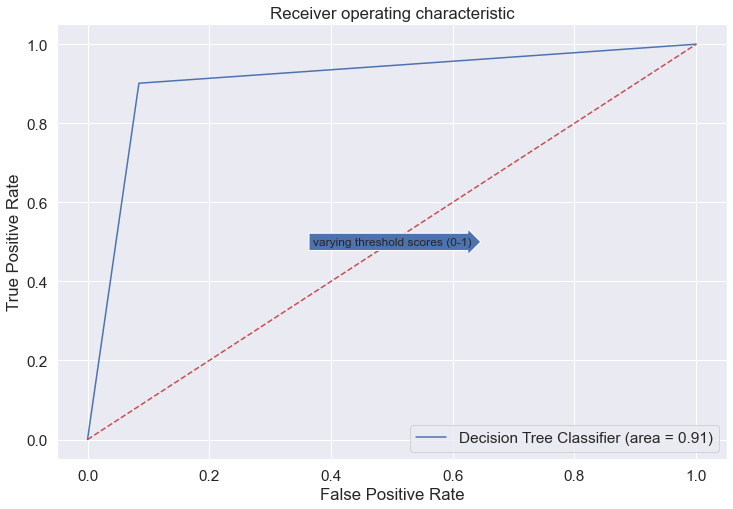

In [236]:
# Gerandao a ccurva ROC e AUC do modelo de Decision Tree
logit_roc_auc = roc_auc_score(y_test, clfAD2.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, clfAD2.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", 
         rotation=0, size=12, ha="center", va="center",
         bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

No handles with labels found to put in legend.


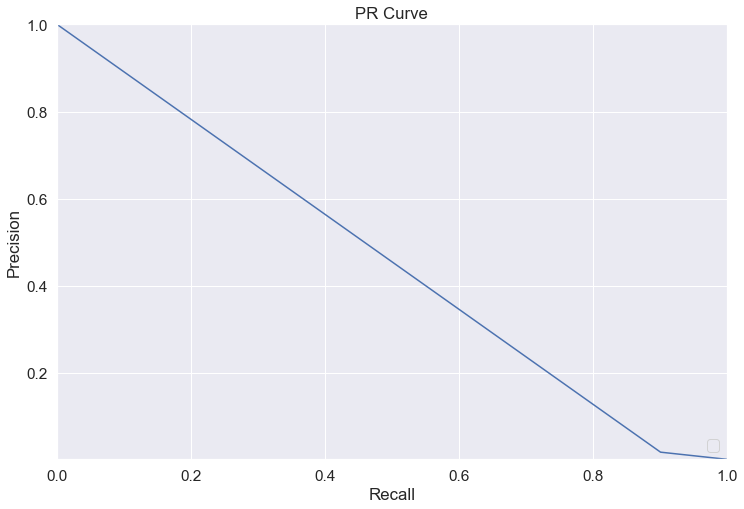

In [237]:
precision, recall, thresholds = precision_recall_curve(y_test, clfAD2.predict_proba(X_test)[:, 1])
plt.figure(figsize = (12,8))
plt.plot(recall, precision)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()

### Aumentando os registros da classe minoritária
- Duplicando os valores de maneira aleatória com o **[RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)**
    - Precisamos garantir que não vamos ter overfitting por mostrar ao modelo várias vezes os mesmos dados

In [238]:
# Importando o RandomOverSampler do imblearn
from imblearn.over_sampling import RandomOverSampler

In [239]:
# Instanciando
ros = RandomOverSampler(random_state=42)

In [240]:
# Aplicando para X e y
X_resROS, y_resROS = ros.fit_resample(X_train, y_train)

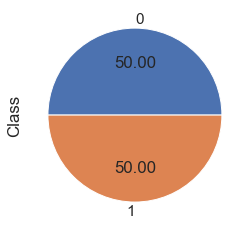

In [241]:
# Visualizando graficamente
y_resROS.value_counts().plot.pie(autopct='%.2f');

In [242]:
# Contando os valores em cada classe
y_resROS.value_counts()

0    190490
1    190490
Name: Class, dtype: int64

**Modelo Balanceado utilizando [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [243]:
# Usando novamente a regressão logística com os dados de oversampling
clfRO2 = LogisticRegression(random_state=0,max_iter=500)
clfRO2 = clfRO2.fit(X_resROS,y_resROS)
y_predRO2 = clf2.predict(X_test)

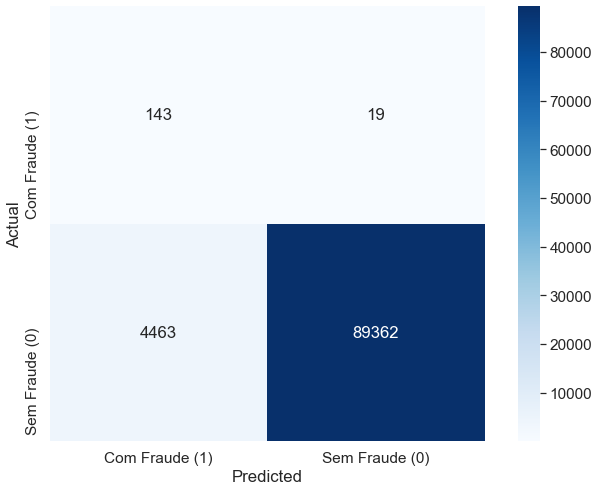

In [244]:
# Gerando a matriz de confusão
logreg_conf_matrix_lrb = confusion_matrix(y_test,y_predRO2)
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4) 
ax = sns.heatmap(logreg_conf_matrix_lrb, cmap='Blues', annot=True, fmt='d', square=True, 
                 xticklabels=['Sem Fraude (0)', 'Com Fraude (1)'], 
                 yticklabels=['Sem Fraude (0)', 'Com Fraude (1)']) 
ax.set(xlabel='Predicted', 
       ylabel='Actual') 
ax.invert_yaxis() 
ax.invert_xaxis()

In [245]:
# Verificando o recall do modelo atual após o rebalanceamento das classes
# recall_score(y_test,y_pred2)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(clfRO2.score(X_train, y_train))) 
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(clfRO2.score(X_test, y_test))) 
print('Recall of logistic regression classifier on test set: {:.4f}'.format(recall_score(y_test, y_predRO2))) 
print('Precision of logistic regression classifier on test set: {:.4f}'.format(precision_score(y_test, y_predRO2))) 
print('ROC/AUC of logistic regression classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clfRO2.predict_proba(X_test)[:,1])))

Accuracy of logistic regression classifier on train set: 0.9710
Accuracy of logistic regression classifier on test set: 0.9709
Recall of logistic regression classifier on test set: 0.8827
Precision of logistic regression classifier on test set: 0.0310
ROC/AUC of logistic regression classifier on test set: 0.9685


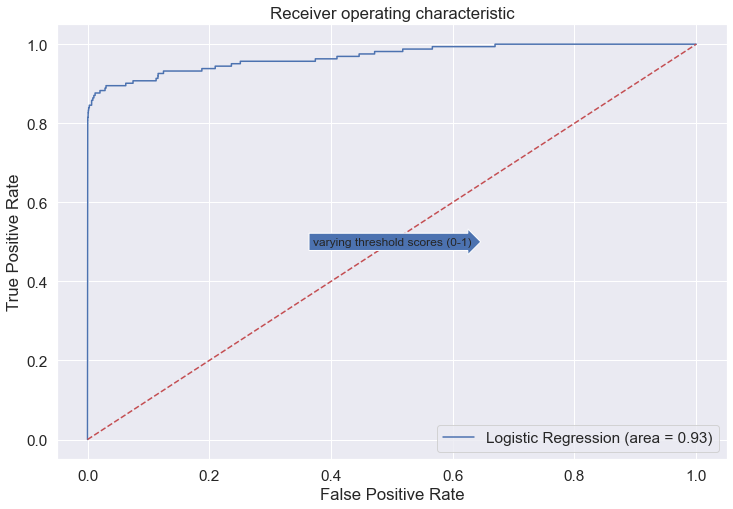

In [246]:
logit_roc_auc = roc_auc_score(y_test, clfRO2.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, clfRO2.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", 
         rotation=0, size=12, ha="center", va="center",
         bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

No handles with labels found to put in legend.


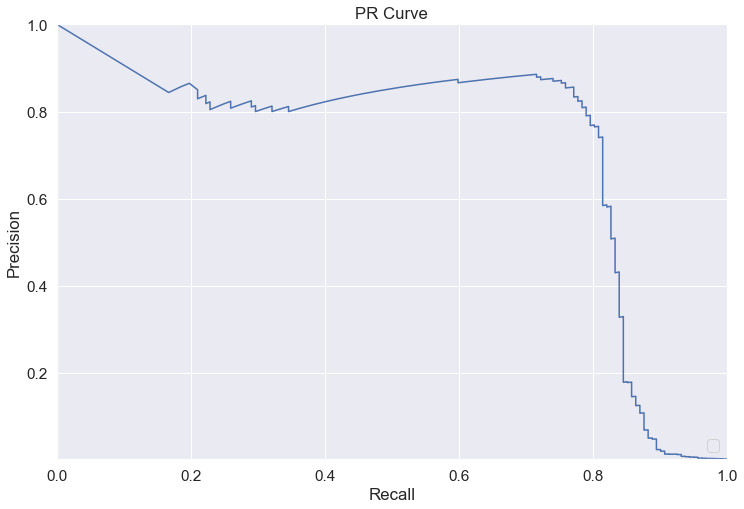

In [247]:
precision, recall, thresholds = precision_recall_curve(y_test, clfRO2.predict_proba(X_test)[:, 1])
plt.figure(figsize = (12,8))
plt.plot(recall, precision)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()

**Modelo Balanceado utilizando [Árvore de Classificação](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)**

In [248]:
# Utilizando a árvore de decisão
clfAD2 = DecisionTreeClassifier(random_state=0)
clfAD2 = clfAD2.fit(X_resROS,y_resROS)
y_predAD2 = clfAD2.predict(X_test)

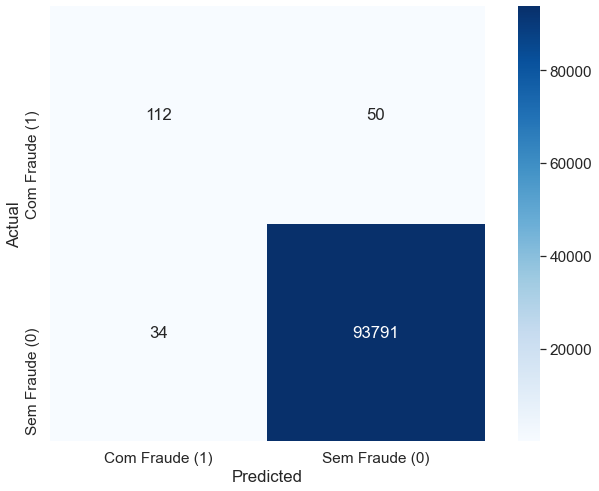

In [249]:
# Gerando a matriz de confusão
logreg_conf_matrix_dtb2 = confusion_matrix(y_test,y_predAD2)
plt.figure(figsize = (12,8)) 
sns.set(font_scale=1.4) 
ax = sns.heatmap(logreg_conf_matrix_dtb2, cmap='Blues', annot=True, fmt='d', square=True, 
                 xticklabels=['Sem Fraude (0)', 'Com Fraude (1)'], 
                 yticklabels=['Sem Fraude (0)', 'Com Fraude (1)']) 
ax.set(xlabel='Predicted', 
       ylabel='Actual') 
ax.invert_yaxis() 
ax.invert_xaxis()

In [250]:
# Rodando os resultados do modelo anterior, antes do rebalanceamento das classes
print('Accuracy of Decision Tree Classifier on train set: {:.4f}'.format(clfAD2.score(X_train, y_train))) 
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(clfAD2.score(X_test, y_test))) 
print('Recall of Decision Tree Classifier on test set: {:.4f}'.format(recall_score(y_test, y_predAD2))) 
print('Precision of Decision Tree Classifier on test set: {:.4f}'.format(precision_score(y_test, y_predAD2))) 
print('ROC/AUC of Decision Tree Classifier on test set: {:.4f}'.format(roc_auc_score(y_test, clfAD2.predict_proba(X_test)[:,1])))

Accuracy of Decision Tree Classifier on train set: 1.0000
Accuracy of Decision Tree Classifier on test set: 0.9991
Recall of Decision Tree Classifier on test set: 0.6914
Precision of Decision Tree Classifier on test set: 0.7671
ROC/AUC of Decision Tree Classifier on test set: 0.8455


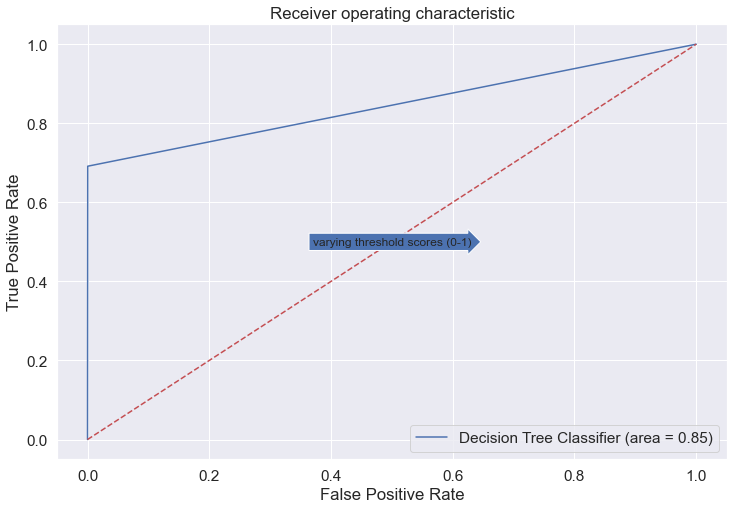

In [251]:
logit_roc_auc = roc_auc_score(y_test, clfAD2.predict(X_test)) 
fpr, tpr, thresholds = roc_curve(y_test, clfAD2.predict_proba(X_test)[:,1]) 
plt.figure(figsize = (12,8)) 
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc) 
plt.plot([0, 1], [0, 1],'r--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", 
         rotation=0, size=12, ha="center", va="center",
         bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.savefig('Log_ROC') 
plt.show()

No handles with labels found to put in legend.


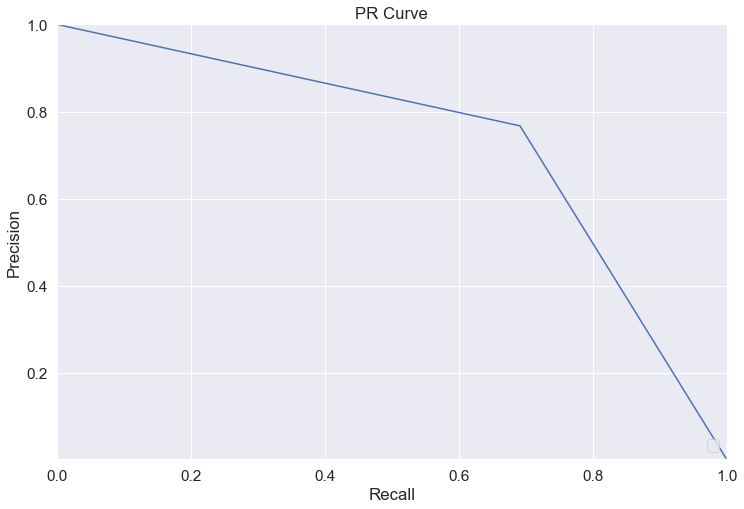

In [252]:
precision, recall, thresholds = precision_recall_curve(y_test, clfAD2.predict_proba(X_test)[:, 1])
plt.figure(figsize = (12,8))
plt.plot(recall, precision)
plt.margins(0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Curve')
plt.legend(loc="lower right")
plt.show()

**Visualizando graficamente esse resultado**

In [253]:
# Visualizando graficamente
import matplotlib.pyplot as plt

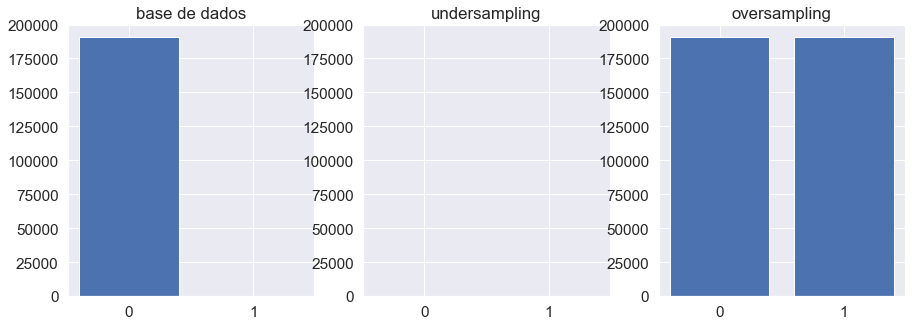

In [254]:
# Plotando os 3 gráficos de barra
fig,ax=plt.subplots(ncols=3,figsize=(15,5))

ax[0].bar(y_train.value_counts().index,y_train.value_counts().values)
ax[1].bar(y_res.value_counts().index,y_res.value_counts().values)
ax[2].bar(y_resROS.value_counts().index,y_resROS.value_counts().values)

ax[0].set(ylim=(0,200000),xticks=[0,1])
ax[0].set_title('base de dados')
ax[1].set(ylim=(0,200000),xticks=[0,1])
ax[1].set_title('undersampling')
ax[2].set(ylim=(0,200000),xticks=[0,1])
ax[2].set_title('oversampling')

plt.show()

**Também existem várias outras formas de fazermos o undersampling e o oversampling e todas elas são explicadas na própria documentação**<br>
- Undersampling:
    - https://imbalanced-learn.org/stable/references/under_sampling.html
- Oversampling:
    - https://imbalanced-learn.org/stable/references/over_sampling.html
- Reproducible Machine Learning for Credit Card Fraud detection - Practical handbook
    - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html
- Understand AUC - ROC and Precision-recall Curve
    - https://medium.com/@data.science.enthusiast/auc-roc-curve-ae9180eaf4f7
- Precision - Recall Curve, a Different View of Imbalanced Classifiers
    - https://sinyi-chou.github.io/classification-pr-curve/